In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, log_loss, confusion_matrix, roc_curve, auc, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/5
19995/19995 [==============================] - 108s 5ms/step - loss: 0.4222 - accuracy: 0.8310 - val_loss: 0.4162 - val_accuracy: 0.8320
Epoch 2/5
19995/19995 [==============================] - 89s 4ms/step - loss: 0.4169 - accuracy: 0.8317 - val_loss: 0.4181 - val_accuracy: 0.8307
Epoch 3/5
19995/19995 [==============================] - 81s 4ms/step - loss: 0.4160 - accuracy: 0.8319 - val_loss: 0.4156 - val_accuracy: 0.8325
Epoch 4/5
19995/19995 [==============================] - 89s 4ms/step - loss: 0.4155 - accuracy: 0.8320 - val_loss: 0.4152 - val_accuracy: 0.8324
Epoch 5/5
159956/159956 [==============================] - 302s 2ms/step
Performance on Training Dataset:
Accuracy: 0.8323656158922388
Log Loss: 0.41501317459763576
F1 Score: 0.7712006280730761
Classification Report:
              precision    recall  f1-score       support
0              0.837105  0.990869  0.907520  4.248869e+06
1              0.565300  0.058012  0.105225  8.697050e+05
accuracy       0.832366 

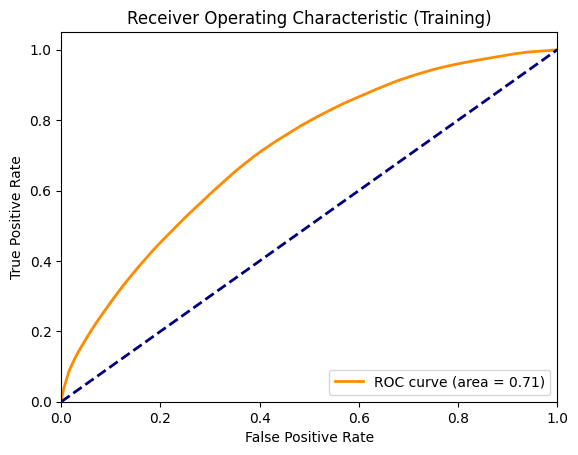

39989/39989 [==============================] - 79s 2ms/step
Performance on Validation Dataset:
Accuracy: 0.8325745285407504
Log Loss: 0.4150021578885157
F1 Score: 0.7715220797743804
Classification Report:
              precision    recall  f1-score       support
0              0.837228  0.990966  0.907633  1.062218e+06
1              0.571090  0.058765  0.106564  2.174260e+05
accuracy       0.832575  0.832575  0.832575  8.325745e-01
macro avg      0.704159  0.524865  0.507098  1.279644e+06
weighted avg   0.792008  0.832575  0.771522  1.279644e+06
Normalized Confusion Matrix:
[[0.99096607 0.00903393]
 [0.94123518 0.05876482]]


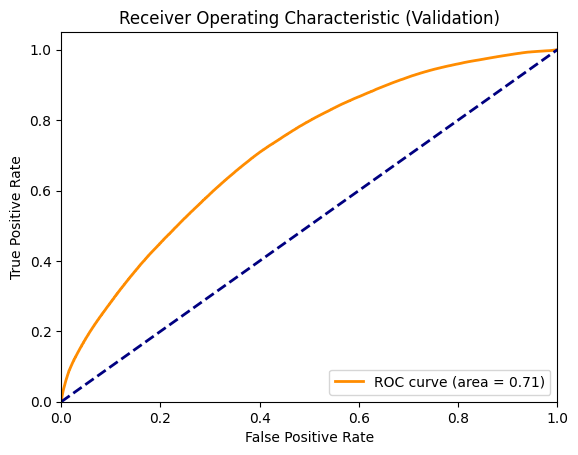

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, log_loss, confusion_matrix, roc_curve, auc, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your scaled data here
df_train = pd.read_csv('/content/drive/MyDrive/AI ML Project/Encoded_X_Train_10_percent_data.csv')
df_val = pd.read_csv('/content/drive/MyDrive/AI ML Project/Encoded_X_val_10_percent_data.csv')

# Prepare the datasets
X_train = df_train.drop('click', axis=1)
y_train = df_train['click']
X_val = df_val.drop('click', axis=1)
y_val = df_val['click']

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), use_bias=True),
    Dense(64, activation='relu', use_bias=True),
    Dense(1, activation='sigmoid', use_bias=False)
])

# Compile the model with RMSprop optimizer
rmsprop_optimizer = RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False)
model.compile(optimizer=rmsprop_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=256)

# Function to calculate and print performance metrics
def evaluate_performance(X, y, dataset_name):
    # Predict probabilities and classes
    y_pred_probs = model.predict(X)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Accuracy
    accuracy = accuracy_score(y, y_pred)

    # Log Loss
    log_loss_value = log_loss(y, y_pred_probs)

    # Classification Report and F1 Score
    report = classification_report(y, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    report_df = pd.DataFrame(report).transpose()

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Print Metrics
    print(f"Performance on {dataset_name} Dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Log Loss: {log_loss_value}")
    print(f"F1 Score: {f1_score}")
    print("Classification Report:")
    print(report_df)
    print("Normalized Confusion Matrix:")
    print(cm_normalized)

    # Plot ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate Performance on Training and Validation Datasets
evaluate_performance(X_train, y_train, "Training")
evaluate_performance(X_val, y_val, "Validation")

Testing other models

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_performance(clf, X, y, dataset_name):
    # Predict classes
    y_pred = clf.predict(X)

    # Calculate Log Loss
    log_loss_value = log_loss(y, clf.predict_proba(X))

    # Classification Report, F1 Score
    report = classification_report(y, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    report_df = pd.DataFrame(report).transpose()

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Accuracy
    accuracy = accuracy_score(y, y_pred)

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Print Metrics
    print(f"Performance of {clf.__class__.__name__} on {dataset_name} Dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Log Loss: {log_loss_value}")
    print(f"F1 Score: {f1_score}")
    print("Classification Report:")
    print(report_df)
    print("Confusion Matrix:")
    print(cm)
    print("Normalized Confusion Matrix:")
    print(cm_normalized)

    # Plot ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


-- Epoch 1
Norm: 0.00, NNZs: 21, Bias: -0.000161, T: 5118574, Avg. loss: 0.673306
Total training time: 2.16 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 21, Bias: -0.000307, T: 10237148, Avg. loss: 0.638420
Total training time: 4.50 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 21, Bias: -0.000440, T: 15355722, Avg. loss: 0.609719
Total training time: 6.37 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 21, Bias: -0.000561, T: 20474296, Avg. loss: 0.586047
Total training time: 8.18 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 21, Bias: -0.000672, T: 25592870, Avg. loss: 0.566462
Total training time: 9.97 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 21, Bias: -0.000773, T: 30711444, Avg. loss: 0.550198
Total training time: 11.74 seconds.
-- Epoch 7
Norm: 0.02, NNZs: 21, Bias: -0.000865, T: 35830018, Avg. loss: 0.536640
Total training time: 13.52 seconds.
-- Epoch 8
Norm: 0.03, NNZs: 21, Bias: -0.000950, T: 40948592, Avg. loss: 0.525293
Total training time: 15.77 seconds.
-- Epoch 9
Norm: 0.03, NNZs: 21, Bias: -0.001028, T: 4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance of SGDClassifier on Training Dataset:
Accuracy: 0.8300884191573669
Log Loss: 0.4617206542365792
F1 Score: 0.7530202108337872
Classification Report:
              precision    recall  f1-score       support
0              0.830088  1.000000  0.907157  4.248869e+06
1              0.000000  0.000000  0.000000  8.697050e+05
accuracy       0.830088  0.830088  0.830088  8.300884e-01
macro avg      0.415044  0.500000  0.453578  5.118574e+06
weighted avg   0.689047  0.830088  0.753020  5.118574e+06
Confusion Matrix:
[[4248869       0]
 [ 869705       0]]
Normalized Confusion Matrix:
[[1. 0.]
 [1. 0.]]


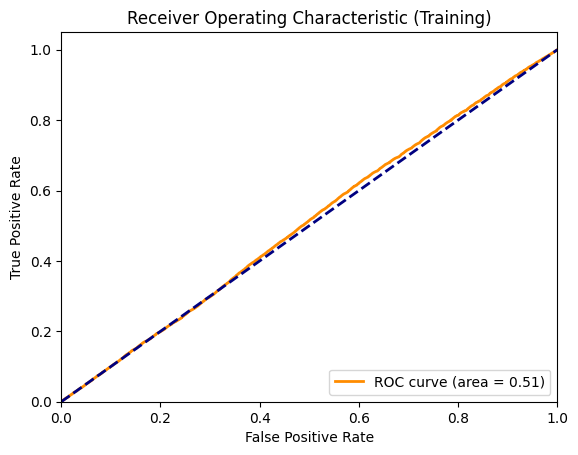

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance of SGDClassifier on Validation Dataset:
Accuracy: 0.8300886809143793
Log Loss: 0.46163061111369624
F1 Score: 0.7530205780387659
Classification Report:
              precision    recall  f1-score       support
0              0.830089  1.000000  0.907157  1.062218e+06
1              0.000000  0.000000  0.000000  2.174260e+05
accuracy       0.830089  0.830089  0.830089  8.300887e-01
macro avg      0.415044  0.500000  0.453578  1.279644e+06
weighted avg   0.689047  0.830089  0.753021  1.279644e+06
Confusion Matrix:
[[1062218       0]
 [ 217426       0]]
Normalized Confusion Matrix:
[[1. 0.]
 [1. 0.]]


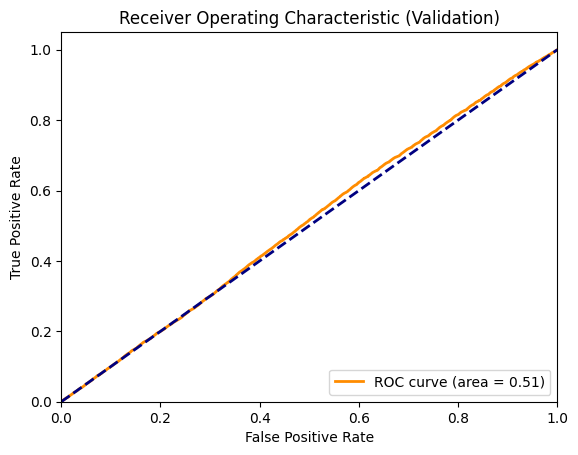

Performance of XGBClassifier on Training Dataset:
Accuracy: 0.835097040699226
Log Loss: 0.3952073247012228
F1 Score: 0.7787356175432656
Classification Report:
              precision    recall  f1-score       support
0              0.840289  0.989394  0.908766  4.248869e+06
1              0.610732  0.081291  0.143483  8.697050e+05
accuracy       0.835097  0.835097  0.835097  8.350970e-01
macro avg      0.725511  0.535343  0.526125  5.118574e+06
weighted avg   0.801284  0.835097  0.778736  5.118574e+06
Confusion Matrix:
[[4203807   45062]
 [ 799006   70699]]
Normalized Confusion Matrix:
[[0.98939435 0.01060565]
 [0.91870922 0.08129078]]


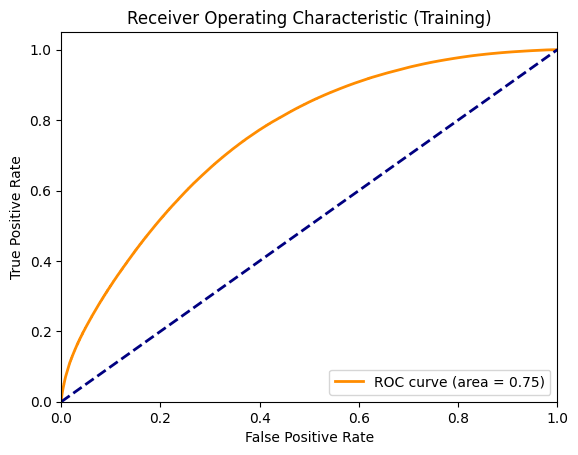

Performance of XGBClassifier on Validation Dataset:
Accuracy: 0.8351533707812485
Log Loss: 0.3959602152464778
F1 Score: 0.7788896674161565
Classification Report:
              precision    recall  f1-score       support
0              0.840356  0.989362  0.908792  1.062218e+06
1              0.611430  0.081780  0.144264  2.174260e+05
accuracy       0.835153  0.835153  0.835153  8.351534e-01
macro avg      0.725893  0.535571  0.526528  1.279644e+06
weighted avg   0.801459  0.835153  0.778890  1.279644e+06
Confusion Matrix:
[[1050918   11300]
 [ 199645   17781]]
Normalized Confusion Matrix:
[[0.98936188 0.01063812]
 [0.91822045 0.08177955]]


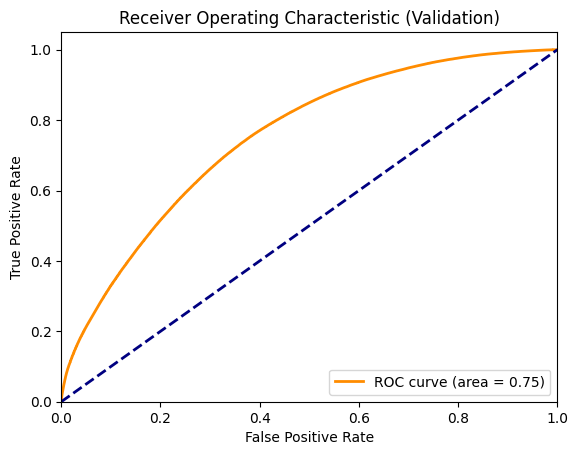

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

classifiers = [
    # GradientBoostingClassifier(),
    SGDClassifier(loss='log', max_iter=30, verbose=5, learning_rate='adaptive', eta0=0.0000000001),
    XGBClassifier(n_estimators=512, max_depth=4)
]

# Train classifiers and evaluate
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)

    # Evaluate Performance on Training and Validation Datasets
    evaluate_performance(clf, X_train, y_train, "Training")
    evaluate_performance(clf, X_val, y_val, "Validation")
